# Observed Taylor law: variance vs mean 
**in protein coding gene length distributions for the different species**

## Import python modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import os 
import pandas as pd



from plotnine import *
import warnings
warnings.filterwarnings('ignore')

## Retrieving the statistical descriptions of the gene length's distributions for the different genomes

In [2]:
# statistics on length distribution for different species
working_on_extra_path = "../../../main_work/"
stat_file = working_on_extra_path + "../main_tables/stat_protCodGenes.tsv"
print("The statistical descriptions of the protein coding gene distributions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_7", "division_8", "species", "trunk_genes_path", "genes_file", "count", "mean", "var"]] 

# visualize data
pd.set_option('display.max_columns', None)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)

The statistical descriptions of the protein coding gene distributions for the different species is in:
 ../../../main_work/../main_tables/stat_protCodGenes.tsv 



,division_7,division_8,species,trunk_genes_path,genes_file,count,mean,var
0,bacteria,archaea,methanobacterium_bryantii_gca_002287175,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_bryantii...,3168,840.404040,422343.848699
1,bacteria,archaea,methanobacterium_formicicum_gca_000762265,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_formicic...,2352,862.427296,347239.612747


(33627, 8)


## Python functions

In [3]:
# species' stats for length distribution
def get_df_for_taxid(df, taxid):
     return df.loc[df["tax_id"]==taxid].copy()

In [4]:
def plot_taylor (df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression): 
    #Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    #Format the regression text
    if 0: 
        print("v = {:4.4} * m^{:4.4};   R^2= {:2.4f}".format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + ' \t ' + '\mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1) +
        geom_smooth(method="lm", color="green", size=0.25, span=.8)+
        labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) # + scale_color_brewer() '#5C2D91'
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(6)],
          limits=[min(df2plot[col_x].to_list())/2, 2*max(df2plot[col_x].to_list())]) 
        + scale_y_log10(breaks = [10**power for power in range(13)], 
          limits = [min(df2plot[col_y].to_list())/2,2*max(df2plot[col_y].to_list())])#, labels=scientific_format(digits=2)
    ) + theme(legend_position=(0.75,0.25), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=0.015*max(df2plot[col_x].to_list()), y=0.65*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    print(p)

#### Filter some species

In [5]:
if 0:
    print(stat_df["division_8"].value_counts())
def filter_nan_in_division8(df):    
    cond = df["division_8"].isin(["bacteria", "archaea","protists", "plants", "fungi", "metazoa", "vertebrates"])  # avoid: empty or viruses
    df = df[cond]
    return df

def filter_species_mus_caroli(df):  #outlier...should not go out  
     return df[df["species"] != "mus_caroli"]

if 0:
    print(stat_df.shape)
    print(stat_df["division_8"].value_counts())

## Observations: variance vs. mean (represented in $log_{10}$ scale)
## Protein coding gene length distributions  
$\sigma^{2}$ is the variance   
$\mu$ is the mean  

### All protein coding genes from the paper (33,627)
incluyendo 168 entradas de division_7 que se pierden al hacer el label division_8.

(33627, 8)
bacteria       30555
archaea         1228
fungi           1007
protists         237
vertebrates      221
NaN              168
metazoa          115
plants            96
Name: division_8, dtype: int64


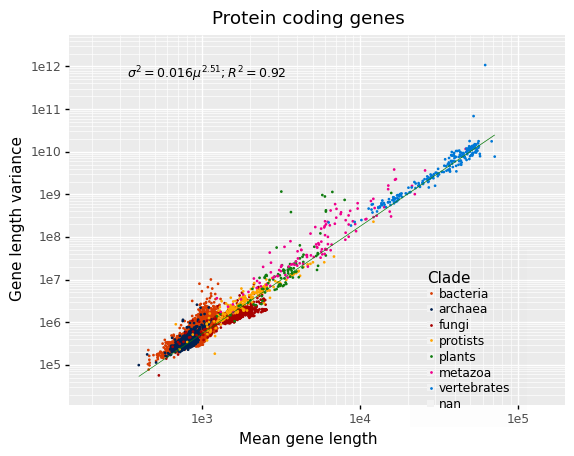

In [6]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = True

df2plot = stat_df.copy()
if 1:
    print(df2plot.shape)
    print(df2plot['division_8'].value_counts(dropna=False))
# Sort division_8 in order to plot the clades in an order (everything can be displayed)
if 0:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $

### Protein coding genes (33,459)
excluyendo 168 entradas del conjunto total de 33,627. Son entradas de division_7 que se pierden al hacer el label division_8.

(33459, 8)
bacteria       30555
archaea         1228
fungi           1007
protists         237
vertebrates      221
metazoa          115
plants            96
Name: division_8, dtype: int64


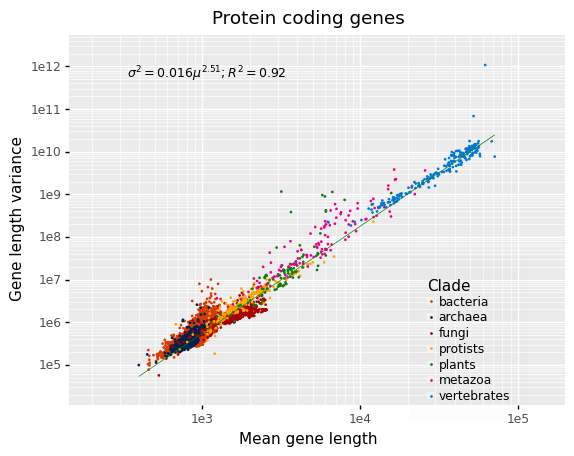

In [7]:
df2plot = stat_df.copy()
df2plot = filter_nan_in_division8(df2plot)
if 0:
    df2plot = filter_species_mus_caroli(df2plot) # puedo filtrar tb. mus. caroli, si quiero, como sugería Fer en el paper

if 1:
    print(df2plot.shape)
    print(df2plot['division_8'].value_counts(dropna=False))
    
# Sort division_8 in order to plot the clades in an order (everything can be displayed)
# perhaps transparency to protist will solve the visualization problem
if 0:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

### Protein coding genes (contour plot)
6519 entradas 

,division_7,division_8,species,mean,var
0,bacteria,archaea,methanobacterium_bryantii_gca_002287175,840.40404,422343.848699


(33627, 5)


,division_7,division_8,species,mean,var
0,bacteria,archaea,methanobacterium_bryantii_gca_002287175,840.404040,4.223438e+05
21302,bacteria,bacteria,lysinibacillus_sinduriensis_blb_1_jcm_15800_gc...,867.224011,3.028445e+05
21301,bacteria,bacteria,arenimonas_metalli_cf5_1_gca_000747155,994.334414,4.589593e+05
21300,bacteria,bacteria,arenimonas_malthae_cc_jy_1_gca_000747075,973.837819,4.262095e+05
21299,bacteria,bacteria,lysinibacillus_manganicus_dsm_26584_gca_000772945,876.167464,2.924904e+05
...,...,...,...,...,...
33368,vertebrates,vertebrates,microcebus_murinus,51115.559736,1.121338e+10
33367,vertebrates,vertebrates,vicugna_pacos,54849.407565,1.142291e+10
33366,vertebrates,vertebrates,bos_taurus_hybrid,51205.193613,1.305354e+10
33375,vertebrates,vertebrates,chinchilla_lanigera,47841.241451,9.473522e+09


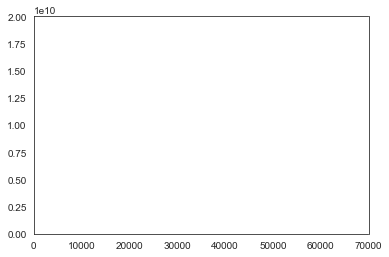

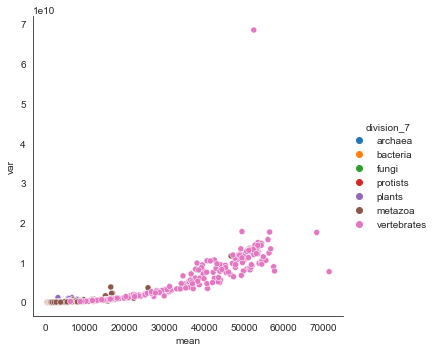

In [21]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_7"
#
title_template = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Counts"
#
#
Lg_df = stat_df.copy()
Lg_df = Lg_df[['division_7', 'division_8', "species", 'mean', 'var']] # [['division_7', 'division_8', 'species', 'trunk_genes_path', 'genes_file', 'count', 'mean', 'var']]

# sort by groups of organisms
Lg_df[legends_by] = pd.Categorical(Lg_df[legends_by], 
                                  categories=['archaea','bacteria', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                  ordered=True)
Lg_df.sort_values(legends_by, inplace=True)

display(Lg_df.head(1))
if 1:
    print(Lg_df.shape)
df = Lg_df
df = filter_species_mus_caroli(df)
#df = df[df["division_7"] == "bacteria"]

#df = sns.load_dataset('iris')
display(df)
# set seaborn style
# depict visualization
fig, ax = plt.subplots()
##sns.distplot(df, ax=ax)
ax.set_ylim(0, 2*10**10)
ax.set_xlim(0, 70000)
sns.set_style("white")
sns.relplot(data=df, x="mean", y="var", hue="division_7")
plt.show()



if 0:
    # Basic 2D density plot
    sns.kdeplot(x=df.sepal_width, y=df.sepal_length)
    plt.show()
    # Custom the color, add shade and bandwidth
    sns.kdeplot(x=df.sepal_width, y=df.sepal_length, cmap="Reds", shade=True, bw_adjust=.5)
    plt.show()
    # Add thresh parameter
    sns.kdeplot(x=df.sepal_width, y=df.sepal_length, cmap="Blues", shade=True, thresh=0)
    plt.show()




if 0: # Set up to 1 for plotting by clade         
    #title = title_template + " (" + str(clade_Lg_df.shape[0]) + " " + str(clade) + ")"
    title = "test_title"
    # set seaborn style
    sns.set_style("white")
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(8, 6))  
    ax.set(title=title, xlabel="mean", ylabel="var")
    #
    sns.histplot(data=Lg_df, x="mean", bins=100)
    # Custom the color, add shade and bandwidth
    #sns.kdeplot(x=Lg_df.mean, y=df.var, cmap="Reds", shade=True, bw_adjust=.5)
    sns.kdeplot(data=Lg_df, x="mean", y="var")
    plt.show()
    
    #sns.histplot(data=clade_Lg_df, x="mean", bins=100)
    #sns.displot(data=Lg_df, x="mean", bins=100, stat="density")
    #plt.show()

    if clade == "protists": # replot protists
        sns.set_theme()
        fig, ax = plt.subplots(figsize=(9, 6))  
        ax.set(title=title, xlabel=x_lab, ylabel=y_lab)
        #
        #ax.set_xlim(500, 4000) 
        sns.histplot(data=clade_Lg_df, x="mean", bins=100)
        plt.show()
